In [3]:
from IPython.display import Image

# <font color="brown">01. 파이토치 패키지의 기본 구성</font>

---

## <font color="orange">1. torch</font>

- 메인 네임스페이스를 뜻한다.

- 텐서 등의 다양한 수학 함수가 포함되어져 있으며 Numpy와 유사한 구조를 가진다.

## <font color="orange">2. torch.autograd</font>

- 자동 미분을 위한 함수들이 포함되어 있다.

- 자동 미분의 on/off를 제어하는 콘텍스트 매니저(enable_grad/no_grad)나 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 'Function' 등이 포함되어 있다.

## <font color="orange">3. torch.nn</font>

- 신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의되어 있다.

- 예를 들어 RNN, LSTM과 같은 레이어, ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수들이 있다.

## <font color="orange">4. torch.optim</font>

- 확률적 경사 하강법(Stochastic Gradient Descent, SGD)를 중심으로 한 파라미터 최적화 알고리즘이 구현되어 있다.

## <font color="orange">5. torch.utils.data</font>

- SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함되어 있다.

## <font color="orange">6. torch.onnx</font>

- ONNX(Open Neural Network Exchange)의 포맷으로 모델을 익스포트(export)할 때 사용한다.

- ONNX는 서로 다른 딥러닝 프레임워크 간에 모델을 공유할 때 사용하는 포맷이다.

# <font color="brown">02. 텐서 조작하기(Tensor Manipulation) 1</font>

---

## <font color="orange">1. 벡터, 행렬 그리고 텐서(Vector, Matrix and Tensor)</font>

### 1) 벡터, 행렬, 텐서 그림으로 이해하기

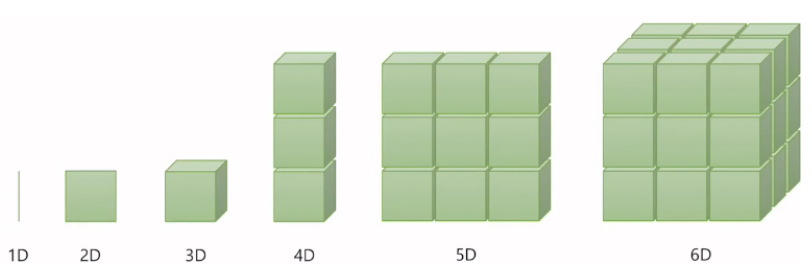

In [4]:
Image("./Images/벡터, 행렬, 텐서 그림으로 이해하기.png", width = 700, height = 300)

딥러닝을 하게 되면 다루게 되는 가장 기본적인 단위는 **벡터, 행렬, 텐서**이다. 차원이 없는 값을 스칼라 라고 하며, 1차원으로 구성된 값을 벡터 라고 한다.

2차원으로 구성된 값을 행렬(Matrix) 이라고 한다. 그리고 3차원이 되면 우리는 텐서(Tensor) 라고 부른다. 4차원 이상부터는 머리로 생각하기 어려우며, 4차원은 4차원의 텐서를 위로 쌓아 올린 모습으로 상상해보도록 하자.

5차원은 그 4차원을 다시 옆으로 확장한 모습이다. 6차원은 5차원을 뒤로 확장한 모습으로 볼 수 있다.

### 2) PyTorch Tensor Shape Convention

딥러닝을 할 때 다루고 있는 행렬 또는 텐서의 크기를 고려하는 것은 항상 중요하다. 여기서는 앞으로 행렬과 텐서의 크기를 표현할 때 표기하는 방법을 살펴보도록 하자.

**2D Tensor(Typical Simple Setting)**

- $|t| = (Batch Size, Dim)$

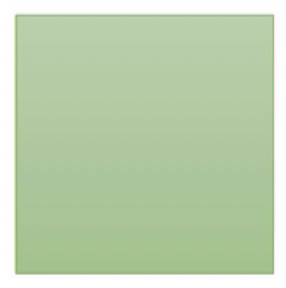

In [5]:
Image("./Images/2D Tensor.png", width = 250, height = 100)

위의 경우는 2차원 텐서의 크기 $|t|$를 (Batch Size x Dimension)으로 표현한 경우이다. 다시 말하면, 행렬에서 행의 크기가 batch size, 열의 크기가 dim 이라는 의미이다.

- 훈련 데이터 하나의 크기를 256이라고 가정해보도록 하자. [3, 1, 2, 5, ...] 이런 숫자들의 나열이 256의 길이로 있다고 생각하면 된다.

- 다시 말해 한 개의 훈련 데이터 = 벡터의 차원은 256이다.

- 만약 이런 훈련 데이터의 개수가 3,000개라고 한다면, 전체 훈련 데이터의 크기는 3000 x 256 이다.

- 따라서 행렬 즉, 2D Tensor가 된다.

- 3,000개를 1개씩 꺼내서 처리하는 것도 가능하지만 컴퓨터는 훈련 데이터를 하나씩 처리하기 보다는 보통 덩어리로 처리한다.

- 3,000개에서 64개씩 꺼내서 처리한다고 하면 이때 **Batch Size**를 64라고 한다.

- 그렇다면 컴퓨터가 한 번에 처리하는 2D 텐서의 크기는 (Batch Size x dim) = 64 x 256 이다.

**3D Tensor(Typical Computer Vision) - 비전 분야에서의 3차원 텐서**

- $|t| = (Batch Size, Width, Height)$

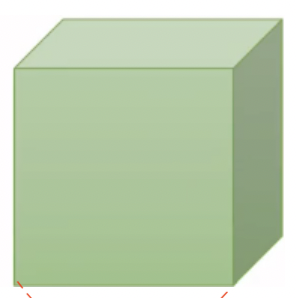

In [6]:
Image("./Images/3D Tensor.png", width = 250, height = 100)

일반적으로 자연어 처리보다 비전 분야(이미지, 영상 처리)를 하게 되면, 좀 더 복잡한 텐서를 다루게 된다.

이미지라는 것은 가로, 세로라는 것이 존재한다.

그리고 여러 장의 이미지 즉, batch size로 구성하게 되면 아래와 같이 3차원의 텐서가 된다.

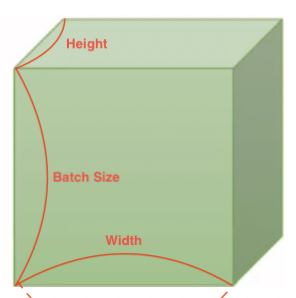

In [7]:
Image("./Images/3D Tensor 2.png", width = 250, height = 100)

위의 그림은 세로는 Batch Size, 가로는 너비(Width), 그리고 안쪽으로는 높이(Height)가 되는 것을 보여준다.

**3D Tensor(Typical Natural Language Processing) - NLP 분야에서의 3차원 텐서**

- $|t| = (Batch Size, length, dim)$

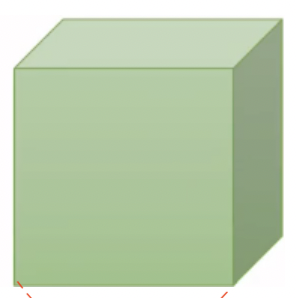

In [8]:
Image("./Images/3D Tensor.png", width = 250, height = 100)

자연어 처리는 보통 (Batch Size, 문장 길이, 단어 벡터의 차원)이라는 3차원 텐서를 사용한다.

**NLP 분야의 3D 텐서 예제로 이해하기**

아래와 같이 4개의 문장으로 구성된 전체 훈련 데이터가 있다고 가정하자.

```python
[[나는 사과를 좋아해], [나는 바나나를 좋아해], [나는 사과를 싫어해], [나는 바나나를 싫어해]]
```

컴퓨터가 이 상태로는 '나는 사과를 좋아해'가 단어가 1개인지 3개인지 이해하지 못한다. 따라서 컴퓨터의 입력으로 사용하기 위해 단어별로 나누어줘야 한다.

```python
[["나는", "사과를", "좋아해"], ["나는", "바나나를", "좋아해"], ["나는", "사과를", "좋아해"], ["나는", "바나나를", "싫어해"]]
```

이제 훈련 데이터의 크기는 4 x 3의 크기를 가지는 2D 텐서이다. 컴퓨터는 텍스트보다는 숫자를 더 잘 처리하며, 이제 각 단어를 벡터로 만들어보도록 하자. 아래와 같이 단어를 3차원의 벡터로 변환했다고 가정해보도록 하자.

```python
"나는" = [0.1, 0.2, 0.9]
"사과를" = [0.3, 0.5, 0.1]
"바나나를" = [0.3, 0.5, 0.2]
"좋아해" = [0.7, 0.6, 0.5]
"싫어해" = [0.5, 0.6, 0.7]
```

위 기준을 따라서 훈련 데이터를 재구성하면 아래와 같다.

```python
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]
```

이렇게 되면, 훈련 데이터는 4 x 3 x 3의 크기를 가지는 3D 텐서이다. 이제 Batch Size를 2로 해보도록 하자.

```python
# 첫번째 배치
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]]]

# 두번째 배치
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
[[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]
```

## <font color="orange">2. 넘파이로 텐서 만들기(벡터와 행렬 만들기)</font>

In [9]:
import numpy as np

### 1) 1D with Numpy

Numpy로 1차원 텐서인 벡터를 만들어보도록 하자.

In [10]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
display(t)

array([0., 1., 2., 3., 4., 5., 6.])

1차원 텐서인 벡터의 차원과 크기를 출력해보도록 하자.

In [11]:
print("Rank of Numpy array :", t.ndim, "\n")
print("Shape of Numpy array :", t.shape)

Rank of Numpy array : 1 

Shape of Numpy array : (7,)


`.ndim`은 몇 차원인지를 출력해준다. 1차원은 벡터, 2차원은 행렬, 3차원은 3차원 텐서이다. 현재는 벡터이므로 1차원이 출력된다.

`.shape`는 크기를 출력한다. (7,)는 (1, 7)을 의미한다. 다시 말해서 (1 x 7)의 크기를 가지는 벡터이다.

### 2) 2D with Numpy

Numpy로 2차원 행렬을 만들어보도록 하자.

In [12]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
display(t)

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])

In [13]:
print("Rank of Numpy array :", t.ndim, "\n")
print("Shape of Numpy array :", t.shape)

Rank of Numpy array : 2 

Shape of Numpy array : (4, 3)


## <font color="orange">3. 파이토치 텐서 선언하기(PyTorch Tensor Allocation)</font>

In [14]:
import torch

### 1) 1D with PyTorch

파이토치로 1차원 텐서인 벡터를 만들어보도록 하자.

In [15]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
display(t)

tensor([0., 1., 2., 3., 4., 5., 6.])

In [16]:
# 위와 동일한 텐서 만들기
t = torch.tensor([0, 1, 2, 3, 4, 5, 6], dtype = torch.float)
display(t)

tensor([0., 1., 2., 3., 4., 5., 6.])

`dim()`을 사용하면 현재 텐서의 차원을 보여준다. `shape`나 `size()` 를 사용하면 크기를 확인할 수 있다.

In [17]:
print("Rank of PyTorch tensor :", t.dim(), "\n")
print("Shape of PyTorch tensor :", t.shape, "\n")
print("Shape of PyTorch tensor :", t.size())

Rank of PyTorch tensor : 1 

Shape of PyTorch tensor : torch.Size([7]) 

Shape of PyTorch tensor : torch.Size([7])


현재 1차원 텐서이며, 원소는 7개이다. 인덱스로 접근하는 것과 슬라이싱을 해보도록 하자.

In [18]:
print("인덱스로 접근 결과 :", t[0], t[1], t[-1], "\n")
print("슬라이싱 결과 :", t[2:5], t[4:-1], "\n")
print("슬라이싱 결과 :", t[:2], t[3:])

인덱스로 접근 결과 : tensor(0.) tensor(1.) tensor(6.) 

슬라이싱 결과 : tensor([2., 3., 4.]) tensor([4., 5.]) 

슬라이싱 결과 : tensor([0., 1.]) tensor([3., 4., 5., 6.])


### 2) 2D with PyTorch

In [19]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]])
display(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])

In [20]:
print("Rank of PyTorch tensor :", t.dim(), "\n")
print("Shape of PyTorch tensor :", t.shape, "\n")
print("Shape of PyTorch tensor :", t.size())

Rank of PyTorch tensor : 2 

Shape of PyTorch tensor : torch.Size([4, 3]) 

Shape of PyTorch tensor : torch.Size([4, 3])


In [21]:
print("첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 인덱스 값 가져온 결과 :", t[:, 1], "\n")

print("Shape of tensor :", t[:, 1].size())

첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 인덱스 값 가져온 결과 : tensor([ 2.,  5.,  8., 11.]) 

Shape of tensor : torch.Size([4])


위의 결과는 첫번째 차원을 전체 선택하고, 그 상황에서 두번째 차원의 1번 인덱스 값만을 가져온 경우를 보여준다.

다시 말해 텐서에서 두번째 열에 있는 모든 값을 가져온 상황이다. 그리고 이렇게 값을 가져온 경우의 크기는 4이다.(1차원 벡터)

In [22]:
print(t[:, :-1])

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


위의 결과는 첫번째 차원을 전체 선택한 상황에서 두번째 차원에서는 맨 마지막에서 첫번째를 제외하고 다 가져오는 경우이다.

### 3) 브로드캐스팅(Broadcasting)

두 행렬 A, B가 있다고 가정해보도록 하자. 행렬의 덧셈과 뺄셈을 수행하기 위해서는 두 행렬 A, B의 크기가 같아야 한다. 그리고 두 행렬이 곱셉을 할 때에는 A의 마지막 차원과 B의 첫번째 차원이 일치해야 한다.

물론, 이런 규칙들이 있지만 딥러닝을 하게되면 불가피하게 크기가 다른 행렬 또는 텐서에 대해서 사칙 연산을 수행할 필요가 있는 경우가 생긴다. 이를 위해 파이토치에서는 자동으로 크기를 맞춰서 연산을 수행하게 만드는 **브로드캐스팅** 이라는 기능을 제공한다.

In [23]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])

print(m1 + m2)

tensor([[5., 5.]])


여기에서 m1과 m2의 크기는 둘 다 (1, 2) 이다. 그래서 문제없이 덧셈 연산이 가능하다.

이번에는 크기가 다른 텐서들 간의 연산을 확인해보도록 하자. 아래는 벡터와 스칼라가 덧셈 연산을 수행하는 것을 보여준다. 물론, 수학적으로는 원래 연산이 안되는게 맞지만 파이토치에서는 브로드캐스팅을 통해 이를 연산한다.

In [24]:
# Vector + Scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3])

print("Broadcasting :", m1 + m2)

Broadcasting : tensor([[4., 5.]])


원래 m1의 크기는 (1, 2)이며 m2의 크기는 (1,) 이다. 그런데 파이토치는 m2의 크기를 (1, 2)로 변경하여 연산을 수행한다.

이번에는 벡터간 연산에서 브로드캐스팅이 적용되는 경우를 확인해보도록 하자.

In [25]:
m1 = torch.FloatTensor([[1, 2]])
print(m1, "\n")

m2 = torch.FloatTensor([[3], [4]])
print(m2, "\n")

print(m1 + m2)

tensor([[1., 2.]]) 

tensor([[3.],
        [4.]]) 

tensor([[4., 5.],
        [5., 6.]])


m1의 크기는 (1, 2)이며 m2의 크기는 (2, 1) 이다. 이 두 벡터는 원래 수학적으로는 덧셈을 수행할 수 없다. 그러나 파이토치는 두 벡터의 크기를 (2, 2)로 변경하여 덧셈을 수행한다.

```
# 브로드캐스팅 과정
[1, 2]
→ [[1, 2],
   [1, 2]]
   
[3]
[4]
→ [[3, 3],
   [4, 4]]

```

브로드캐스팅은 편리하지만, 자동으로 실행되는 기능이므로 사용자 입장에서 굉장히 주의해서 사용해야 한다. 예를 들어 A 텐서와 B 텐서가 있을 때, 사용자는 이 두 텐서의 크기가 같다고 착각하고 덧셈 연산을 수행했다고 가정해보도록 하자. 하지만 실제로 이 두 텐서의 크기는 달랐고 브로드캐스팅이 수행되어 덧셈 연산이 수행되었습니다. 만약, 두 텐서의 크기가 다르다고 에러를 발생시킨다면 사용자는 이 연산이 잘못되었음을 바로 알 수 있지만 브로드캐스팅은 자동으로 수행되므로 사용자는 나중에 원하는 결과가 나오지 않았더라도 어디서 문제가 발생했는지 찾기가 굉장히 어려울 수 있다.

### 4) 자주 사용되는 기능들

#### [1]. 행렬 곱셈과 곱셈의 차이(Matrix Multiplication VS Multiplication)

행렬로 곱셈을 하는 방법은 크게 두 가지가 있다. 바로 행렬 곱셈(`.matmul`)과 원소별 곱셈(`.mul`) 이다.

In [26]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])

print("Shape of Matrix 1 :", m1.shape, "\n")
print("Shape of Matrix 2 :", m2.shape, "\n")
print(m1.matmul(m2))

Shape of Matrix 1 : torch.Size([2, 2]) 

Shape of Matrix 2 : torch.Size([2, 1]) 

tensor([[ 5.],
        [11.]])


위의 결과는 2 x 2 행렬과 2 x 1 행렬(벡터)의 행렬 곱셈 결과를 보여준다.

행렬 곱셈이 아니라 element-wise 곱셈이라는 것이 존재한다. 이는 동일한 크기의 행렬이 동일한 위치에 있는 원소끼리 곱하는 것을 말한다. 아래는 서로 다른 크기의 행렬이 브로드캐스팅이 된 후에 element-wise 곱셈이 수행되는 것을 보여준다. 이는 `*` 또는 `mul()`을 통해 수행한다.

In [27]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])

print(m1 * m2, "\n")
print(m1.mul(m2))

tensor([[1., 2.],
        [6., 8.]]) 

tensor([[1., 2.],
        [6., 8.]])


m1 행렬의 크기는 (2, 2)이며 m2 행렬의 크기는 (2, 1)이다. 이때 element-wise 곱셈을 수행하면, 두 행렬의 크기는 브로드캐스팅이 된 후에 곱셈이 수행된다. 더 정확히 여기서는 m2의 크기가 변환된다.

#### [2]. 평균(Mean)

In [28]:
t = torch.FloatTensor([[1, 2]])
print(t.mean())

tensor(1.5000)


이번에는 2차원인 행렬을 선언하여 평균을 구해보도록 하자.

In [29]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t, "\n")
print(t.mean())

tensor([[1., 2.],
        [3., 4.]]) 

tensor(2.5000)


4개 원소의 평균인 2.5가 나왔음을 확인할 수 있다 이번에는 dim 즉, 차원을 인자로 주는 경우 확인해보도록 하자.

In [30]:
# 열 방향 평균 구하기
print(t.mean(dim = 0))

tensor([2., 3.])


`dim = 0` 이라는 것은 첫번째 차원을 의미한다. 행렬에서 첫번째 차원은 `행`을 의미한다.

그리고 인자로 dim을 준다면 해당 차원을 제거한다는 의미가 된다. 즉, 행렬에서 `열`만을 남기겠다는 의미가 된다.

기존 행렬의 크기는 (2, 2) 였지만 이를 수행하면 열의 차원만 보존되면서 (1, 2)가 된다.

이는 (2,)와 같으며 벡터를 의미한다.

이번에는 인자로 `dim = 1`을 주도록하자. 이번에는 두번째 차원을 제거하게 되며, 열이 제거된 텐서가 되어야 한다.

In [31]:
print(t.mean(dim = 1))

tensor([1.5000, 3.5000])


#### [3]. 덧셈(Sum)

덧셈은 평균과 연산 방법이나 인자가 의미하는 바가 정확히 동일하다.

In [32]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [33]:
print("원소 전체의 덧셈 :", t.sum(), "\n")
print("행을 제거한 덧셈 :", t.sum(dim = 0), "\n")
print("열을 제거한 덧셈 :", t.sum(dim = 1))

원소 전체의 덧셈 : tensor(10.) 

행을 제거한 덧셈 : tensor([4., 6.]) 

열을 제거한 덧셈 : tensor([3., 7.])


#### [4]. 최대(Max)와 아그맥스(ArgMax)

최대는 원소의 최대값을 리턴하고, 아그맥스는 최대값을 가진 인덱스를 리턴한다. (2, 2) 크기의 행렬을 선언하고 Max를 사용해보도록 하자.

In [34]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [35]:
print("Max of tensor :", t.max())

Max of tensor : tensor(4.)


원소 중 최대값인 4를 리턴한다.

이번에는 인자로 `dim = 0`를 주도록 한다. 첫번째 차원을 제거한다는 의미이다.

In [36]:
t.max(dim = 0)

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))

위의 결과를 보면 `values`와 함께 `indices`도 같이 출력되었음을 확인할 수 있다. `max()` 함수에 dim 인자를 주면 argmax도 함께 리턴하는 특징 때문이다.

첫번째 열에서 3의 인덱스는 1이다. 두번째 열에서 4의 인덱스는 1이다. 따라서 [1, 1]이 리턴되는 것이다.

만약 두 개를 함께 리턴받는 것이 아니라 max또는 argmax만 리턴받고 싶다면 다음과 같이 리턴값에도 인덱스를 부여하면 된다. 0번 인덱스를 사용하면 max 값만 받아올 수 있고, 1번 인덱스를 사용하면 argmax 값만 받아올 수 있다.

In [37]:
print("Max of tensor :", t.max(dim = 0)[0], "\n")
print("ArgMax of Tensor :", t.max(dim = 0)[1])

Max of tensor : tensor([3., 4.]) 

ArgMax of Tensor : tensor([1, 1])


# <font color="brown">03. 텐서 조작하기(Tensor Manipulation) 2</font>

---

## <font color="orange">1. 뷰(View) - 원소의 수를 유지하면서 텐서의 크기 변경</font>

파이토치 텐서의 뷰(View)는 넘파이에서의 `Reshape`와 같은 역할을 수행한다. Reshape라는 이름에서 알 수 있듯이, 텐서의 크기를 변경해주는 역할을 한다.

실습을 위해 아래와 같이 3차원 텐서를 만들어보도록 하자.

In [41]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])

ft = torch.FloatTensor(t)
display(ft)

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])

In [43]:
print("Rank of tensor :", ft.dim(), "\n")
print("Shape of tensor :", ft.size())

Rank of tensor : 3 

Shape of tensor : torch.Size([2, 2, 3])


### 1) 3차원 텐서에서 2차원 텐서로 변경

위에서 생성한 텐서를 `view`를 사용하여 크기를 2차원 텐서로 변경해보도록 하자.

In [54]:
print("ft 텐서를 (?, 3)의 크기로 변경 : \n\n", ft.view([-1, 3]), "\n")
print("Shape of tensor :", ft.view([-1, 3]).size())

ft 텐서를 (?, 3)의 크기로 변경 : 

 tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]]) 

Shape of tensor : torch.Size([4, 3])


`view([-1, 3])` 이 가지는 의미는 아래와 같다. 

**-1** 은 첫번재 차원은 사용자가 잘 모르겠으니 파이토치에게 맡기겠다는 의미이고, **3** 은 두번째 차원의 길이는 3을 가지도록 하라는 의미이다.

다시 말해 현재 3차원 텐서를 2차원 텐서로 변경하되 (?, 3)의 크기로 변경하라는 의미이다.

결과적으로 (4, 3)의 크키를 가지는 텐서를 얻게된다.

변경하게되는 규칙을 정리해보도록 하자.

- `view`는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 한다.

- 파이토치의 `view`는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추한다.

변경 전 텐서 원소의 수는 (2 x 2 x 3) = 12개 이며, 변경 후 텐서 원소의 개수 또한 (4 x 3) = 12개 이다.

### 2) 3차원 텐서의 크기 변경

이번에는 3차원 텐서에서 3차원 텐서로 차원은 유지하되, 크기(shape)를 바꾸는 작업을 해보도록 하자.

`view`로 텐서의 크기를 변경하더라도 원소의 수는 유지되어야 한다는 점을 주의하도록 하자.

In [55]:
print(ft.view([-1, 1, 3]), "\n")
print("Shape of tensor :", ft.view([-1, 1, 3]).size())

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]]) 

Shape of tensor : torch.Size([4, 1, 3])


## <font color="orange">2. 스퀴즈(Squeeze) - 1인 차원을 제거</font>

`squeeze`는 차원이 1인 경우에 해당 차원을 제거한다.

실습을 위해 임의로 (3 x 1)의 크기를 가지는 2차원 텐서를 만들어보도록 하자.

In [57]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft, "\n")
print("Shape of tensor :", ft.size())

tensor([[0.],
        [1.],
        [2.]]) 

Shape of tensor : torch.Size([3, 1])


위의 텐서는 (3 x 1)의 크기를 가진다. 두번째 차원이 1이므로 `squeeze`를 사용하면 (3,)의 크기를 가지는 텐서로 변경된다.

In [59]:
print(ft.squeeze(), "\n")
print("Shape of tensor :", ft.squeeze().size())

tensor([0., 1., 2.]) 

Shape of tensor : torch.Size([3])


## <font color="orange">3. 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가</font>

`unsqueeze`는 squeeze와 정반대이다. 특정 위치에 1인 차원을 추가할 수 있다.

실습을 위해 임의로 (3,)의 크기를 가지는 1차원 텐서를 만들어보도록 하자.

In [61]:
ft = torch.FloatTensor([0, 1, 2])
print("Shape of tensor :", ft.size())

Shape of tensor : torch.Size([3])


현재는 차원이 1개인 1차원 벡터이다. 여기에 첫번째 차원에 1인 차원을 추가해보도록 하자.

첫번째 차원의 인덱스를 의미하는 숫자 0을 인자로 넣으면 첫번째 차원에 1인 차원이 추가된다.

In [63]:
print(ft.unsqueeze(0), "\n")
print("Shape of tensor :", ft.unsqueeze(0).size())

tensor([[0., 1., 2.]]) 

Shape of tensor : torch.Size([1, 3])


위 결과는 (3,)의 크기를 가졌던 1차원 벡터가 (1, 3)의 2차원 텐서로 변경된 것을 보여준다.

방금 한 연산을 앞서 배운 `view`로도 구현이 가능하다.

2차원으로 바꾸고 싶으면서 첫번째 차원은 1이기를 원한다면 view에서 (1, -1)을 인자로 사용하면 된다.

In [67]:
print(ft.view([1, -1]), "\n")
print("Shape of tensor :", ft.view([1, -1]).size())

tensor([[0., 1., 2.]]) 

Shape of tensor : torch.Size([1, 3])


위의 결과는 `unsqueeze`와 `view`가 동일한 결과를 만든 것을 보여준다.

이번에는 `unsqueeze`의 인자로 **1** 을 넣어보도록 하자.

인덱스는 0부터 시작하므로 이는 두번째 차원에 1을 추가하겠다는 것을 의미한다.

현재 크기는 (3,) 이었으므로 두번째 차원에 1인 차원을 추가하면 (3, 1)의 크기를 가지게 된다.

In [70]:
print(ft.unsqueeze(1), "\n")
print("Shape of tensor :", ft.unsqueeze(1).size())

tensor([[0.],
        [1.],
        [2.]]) 

Shape of tensor : torch.Size([3, 1])


이번에는 `unsqueeze`의 인자로 **-1** 을 넣어보도록 하자.

-1은 인덱스 상으로 마지막 차원을 의미한다.

현재 크기는 (3,) 이었으므로 마지막 차원에 1인 차원을 추가하면 (3, 1)의 크기를 가지게 된다.

다시 말해 현재 텐서의 경우에는 1을 넣은 경우와 -1을 넣은 경우가 같은 결과를 갖게 된다.

In [73]:
print(ft.unsqueeze(-1), "\n")
print("Shape of tensor :", ft.unsqueeze(-1).size())

tensor([[0.],
        [1.],
        [2.]]) 

Shape of tensor : torch.Size([3, 1])


- `view()`, `squeeze()`, `unsqueeze()`는 텐서의 원소 수를 그대로 유지하면서 모양과 차원을 조절한다.

## <font color="orange">4. 타입 캐스팅(Type Casting)</font>

텐서에는 자료형이라는 것이 있다. 각 데이터형별로 정의되어져 있는데, 예를 들어 32비트의 부동 소수점은 `torch.FloatTensor`를, 64비트의 부호 있는 정수는 `torch.LongTensor`를 사용한다.

GPU 연산을 위한 자료형도 있다. 예를 들어 `torch.cuda.FloatTensor`가 그 예이다.

그리고 이 자료형을 변환하는 것을 **타입 캐스팅** 이라고 한다.

In [74]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


텐서에다가 `.float()`를 붙이면 바로 float형으로 타입이 변경된다.

In [76]:
print(lt.float(), "\n")
print("Type of tensor :", lt.float().dtype)

tensor([1., 2., 3., 4.]) 

Type of tensor : torch.float32


이번에는 Byte 타입의 텐서를 만들어보도록 하자.

In [80]:
bt = torch.ByteTensor([True, False, False, True])
print(bt, "\n")
print("Type of tensor :", bt.dtype)

tensor([1, 0, 0, 1], dtype=torch.uint8) 

Type of tensor : torch.uint8


여기에 `.long()` 이라고 하면 long 타입의 텐서로 변경되고 `.float()` 라고 하면 float 타입의 텐서로 변경된다.

In [81]:
print(bt.long(), "\n")
print("Type of tensor :", bt.long().dtype, "\n")

print(bt.float(), "\n")
print("Type of tensor :", bt.float().dtype)

tensor([1, 0, 0, 1]) 

Type of tensor : torch.int64 

tensor([1., 0., 0., 1.]) 

Type of tensor : torch.float32


## <font color="orange">5. 연결하기(Concatenate)</font>

이번에는 두 텐서를 연결하는 방법에 대해서 살펴보도록 하자.

In [82]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

이제 두 텐서를 `torch.cat()`을 통해 연결해보도록 하자.

그런데 연결 방법은 한 가지만 있는 것이 아니다. `torch.cat`은 어느 차원으로 연결할 것인지 인자로 줄 수 있다.

예를 들어 `dim = 0`은 첫번째 차원을 늘리라는 의미를 담고 있다.

In [85]:
print(torch.cat([x, y], dim = 0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


`dim = 0`을 인자로 했더니 두 개의 (2 x 2) 텐서가 (4 x 2) 텐서가 된 것을 확인할 수 있다.

이번에는 `dim = 1`을 인자로 주도록 한다.

In [86]:
print(torch.cat([x, y], dim = 1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


`dim = 1`을 인자로 했더니 두 개의 (2 x 2) 텐서가 (2 x 4) 텐서가 된 것을 확인할 수 있다.

- 딥러닝에서는 주로 모델의 입력 또는 중간 연산에서 두 개의 텐서를 연결하는 경우가 많다.

- 두 텐서를 연결해서 입력으로 사용하는 것은 두 가지의 정보를 모두 사용한다는 의미를 가지고 있다.

## <font color="orange">6. 스택킹(Stacking)</font>

연결(concatenate)을 하는 또 다른 방법으로 스택킹(Stacking)이 있다.

때로는 연결을 하는 것보다 스택킹이 더 편리할 때가 있는데, 이는 스택킹이 많은 연산을 포함하고 있기 떄문이다.

In [87]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [89]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


위 결과는 3개의 벡터가 순차적으로 쌓여 (3 x 2) 텐서가 된 것을 보여준다.

스택킹은 사실 많은 연산을 한 번에 축약하고 있다. 예를 들어 위 작업은 아래의 코드와 동일한 작업이다.

In [92]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


x, y, z는 기존에 전부 (2,)의 크기를 가지고있다. 그런데 `.unsqueeze(0)`을 수행하여 3개의 벡터는 전부 (1, 2)의 크기 2차원 텐서로 변경된다.

여기에 연결을 의미하는 `torch.cat`을 사용하면 (3 x 2) 텐서가 된다.

위에서는 `torch.stack([x, y, z])`라는 한 번의 커맨드로 수행했지만, 연결로 이를 구현하려고 했더니 꽤 복잡해졌음을 확인할 수 있다.

스택킹에 추가적으로 `dim`을 인자로 줄 수 있다.

`dim = 1`인자를 주게되면, 두번째 차원이 증가하도록 쌓으라는 의미로 해석할 수 있다.

In [93]:
print(torch.stack([x, y, z], dim = 1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


## <font color="orange">7. ones_like와 zeors_like - 0으로 채워진 텐서와 1로 채워진 텐서</font>

실습을 위해 (2 x 3) 텐서를 만들어보도록 하자.

In [95]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


위 텐서에 `ones_like`를 하면 동일한 크기이지만 **1** 으로만 값이 채워진 텐서를 생성한다.

In [96]:
print(torch.ones_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


위 텐서에 `zeros_like`를 하면 동일한 크기이지만 **0** 으로만 값이 채워진 텐서를 생성한다.

In [97]:
print(torch.zeros_like(x))

tensor([[0., 0., 0.],
        [0., 0., 0.]])


## <font color="orange">8. In-place Operation (덮어쓰기 연산)</font>

In [98]:
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


곱하기 연산을 한 값과 기존의 값을 출력해보도록 하자.

In [100]:
print(x.mul(2.), "\n")
print(x)

tensor([[2., 4.],
        [6., 8.]]) 

tensor([[1., 2.],
        [3., 4.]])


첫번째 출력은 곱하기 2가 수행된 결과를 보여주고, 두번째 출력은 기존의 값이 그래도 출력된 것을 확인할 수 있다.

곱하기 2를 수행했지만 이를 x에다가 다시 저장하지 않았으니, 곱하기 연산을 하더라도 기존의 값은 변하지 않는 것이 당연하다.

그런데 연산 뒤에 _를 붙이면 기존의 값을 덮어쓰기 한다.

In [101]:
print(x.mul_(2.), "\n")
print(x)

tensor([[2., 4.],
        [6., 8.]]) 

tensor([[2., 4.],
        [6., 8.]])


# <font color="brown">References</font>

---

- [PyTorch로 시작하는 딥러닝 입문](https://wikidocs.net/book/2788)